
Soit le fichier notes.txt suivant : 

13.5
17
9.5
12
14
6
5.5
8.5
10.5
29
14
9
15.5
11.5
16
18
13
12.5
15.5
17

Créez un script Python qui lit chaque ligne de ce fichier, extrait les notes sous forme de float et les stocke dans une liste.

Terminez le script en calculant et affichant la moyenne des notes avec deux décimales.


In [ ]:

notes = []

# remplissage de la liste "notes" avec le contenu du fichier
with open("notes.txt", "r") as file:
    for row in file:
        notes.append(float(row))

print(notes)

# calcul de la moyenne des notes avec deux décimales
average = round(sum(notes) / len(notes), 2)

print(average)




Créez un script Python qui lit chaque ligne de ce fichier, extrait les notes sous forme de float et les stocke dans une liste.

Le script réécrira ensuite les notes dans le fichier notes2.txt avec une note par ligne suivie de « recalé » si la note est inférieure à 10 et « admis » si la note est supérieure ou égale à 10. Toutes les notes seront écrites avec une décimale. 


In [ ]:

with open("notes.txt", "r") as src_file, open("notes2.txt", "w") as dist_file:
    for row in src_file:
        note = float(row)
        if note >= 10:
            dist_file.write(str(note) + " admis \n")
        else:
            dist_file.write(str(note) + " recalé \n")



Consignes de l'exercice à l'adresse suivante : 
https://python.sdv.univ-paris-diderot.fr/07_fichiers/#773-spirale-exercice


In [ ]:

import matplotlib.pyplot as plt

limit = math.pi * 4
step = 0.1
angle = 0
r = 0.5

# récupération des coordonnées cartésiennes
with open("spirales.dat", "w") as file:
    while angle <= limit:
        file.write(f'{round(math.cos(angle) * r, 5):.5f}' + " " + f'{round(math.sin(angle) * r, 5):.5f}' + "\n")
        angle += step 
        r += step

x = []
y = []

with open("spirales.dat", "r") as file:
    for line in file:
        coords = line.split()
        x.append(float(coords[0]))
        y.append(float(coords[1]))

plt.figure(figsize=(8,8))
mini = min(x + y) * 1.2
maxi = max(x + y) * 1.2
plt.xlim(mini, maxi)
plt.ylim(mini, maxi)
plt.plot(x, y)
plt.savefig("spirale.png")



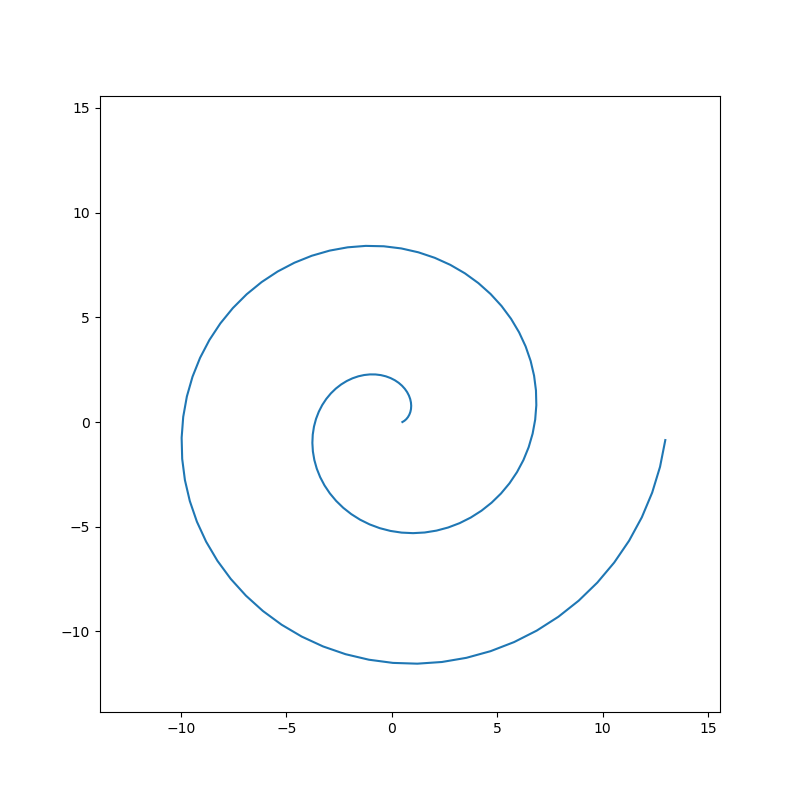


Lecture et écriture avec un fichier csv 


In [ ]:

import csv 

# lecture 
f = open('data.csv')
reader = csv.reader(f)

for row in reader:
    print(row)
    
f.close()
    
# écriture
with open('data_2.csv', 'w', new_line='') as csv_file:
    
writer = csv.writer(csv_file)

writer.writerow(['R', 'Ross Ihaka et Robert Gentleman', '1993', '.r'])



Lecture et écriture avec un fichier csv et pandas


In [1]:

import pandas 

# lecture
csv = pd.read_csv('data.csv')

print(csv)

# écriture 
to_append = [['R', 'Ross Ihaka et Robert Gentleman', '1993', '.r']]

df = pd.DataFrame(to_append)

df.to_csv('data.csv', mode='a', index=False, header=False)



Utilisation de "DataFrame" avec pandas et matpotlib


In [ ]:

import requests
import pandas as pd
import matplotlib.pyplot as plt

API_ENDPOINT = 'https://whiskyhunter.net/api/'

def getDistilleriesInfo():
    response = requests.get(API_ENDPOINT + "distilleries_info")
    if (response.status_code == 200):
        return response.json()
    else: 
        return False 
    
# récupération de données
distilleries = getDistilleriesInfo()

df = pd.DataFrame(distilleries)

countries = df['country'].value_counts()

countries.plot(
    title='Répartition des distilleries de whisky par pays',
    kind='pie', 
    autopct='%1.0f%%',
    ylabel=''
)

plt.show()


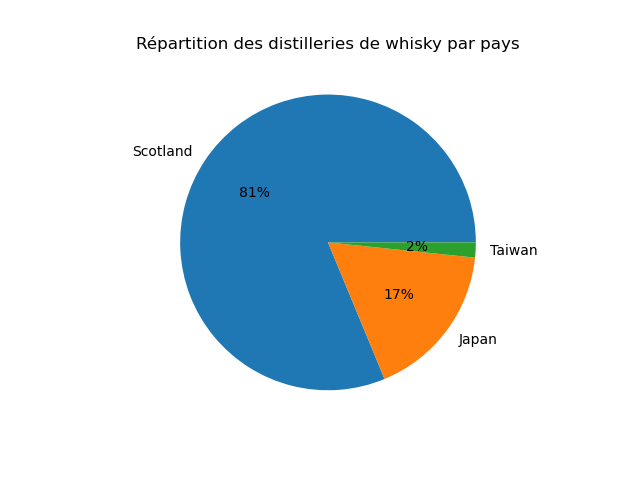